# Analysis of a bigger problem

In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import networkx as nx
import tsplib95

In [2]:
problem = tsplib95.load("tsp_problems/bier127.tsp")
graph = problem.get_graph()
# remove self loops
graph.remove_edges_from(nx.selfloop_edges(graph))
# rename nodes to start from 0
graph = nx.relabel_nodes(graph, {node: node-1 for node in graph.nodes})
print("Nodes in graph:", graph.nodes)
print("Edges in graph:", graph.edges)

Nodes in graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
Edges in graph: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), 

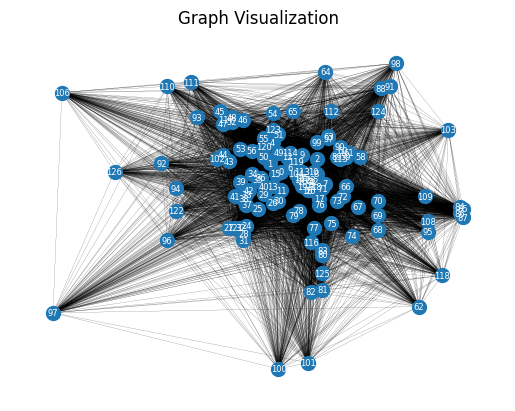

In [3]:
plot_graph(graph)

In [4]:
# compute mean distance of a path between all nodes and the distance between nodes
mean_distance = 0
n = len(graph.nodes)
for i in range(n):
    neighbours = get_neighbours(graph, i)
    mean_distance += np.mean([graph[i][n]['weight'] for n in neighbours])
    
print(mean_distance)
mean_edge = mean_distance/n
print(mean_edge)

max_v = 0
min_v = 100000
for i in range(n):
    neighbours = get_neighbours(graph, i)
    max_ = np.max([graph[i][n]['weight'] for n in neighbours])
    min_ = np.min([graph[i][n]['weight'] for n in neighbours])
    if min_ < min_v:
        min_v = min_
    if max_ > max_v:
        max_v = max_
print(min_v, max_v)

628963.6507936509
4952.469691288589
116 19441


In [20]:
min_path, cost = min_path_cost(graph)

print("Hamiltonian Circuit:", min_path)
print("Path Length:", len(min_path))
print("Heuristic min cost:", cost)

norm = cost/mean_edge
print("Norm constant", norm)
print("Min weight normalised", min_v*norm)
print("Max weight normalised",max_v*norm)

Hamiltonian Circuit: [53, 56, 120, 4, 55, 123, 51, 49, 12, 114, 9, 119, 6, 0, 15, 1, 50, 34, 35, 36, 40, 13, 11, 30, 26, 29, 42, 33, 38, 37, 25, 24, 32, 121, 27, 28, 31, 79, 78, 76, 17, 20, 16, 21, 3, 22, 23, 5, 105, 14, 107, 19, 18, 71, 7, 8, 10, 113, 104, 2, 89, 115, 59, 61, 60, 90, 57, 63, 99, 112, 65, 54, 46, 48, 52, 117, 47, 45, 93, 111, 110, 106, 126, 92, 94, 122, 96, 41, 39, 43, 44, 102, 73, 72, 66, 67, 70, 69, 68, 74, 75, 77, 116, 83, 80, 125, 81, 82, 101, 100, 62, 118, 95, 108, 86, 85, 84, 87, 109, 58, 124, 88, 91, 98, 64, 103, 97, 53]
Path Length: 128
Heuristic min cost: 149541
Norm constant 30.195237794800263
Min weight normalised 3502.6475841968304
Max weight normalised 587025.6179687119


In [60]:
n = len(graph.nodes)
rate = 5
tsp = TSP(graph, alpha=1., beta=4., alpha_rate=0.95 , beta_rate=1.05, rate=rate, rho=0.7, max_iter=300, k=int(np.sqrt(n)), heuristic_cost=cost, norm=cost/mean_edge, opt=False, check_improvement=False, update_steps=150)
path = tsp.solve()

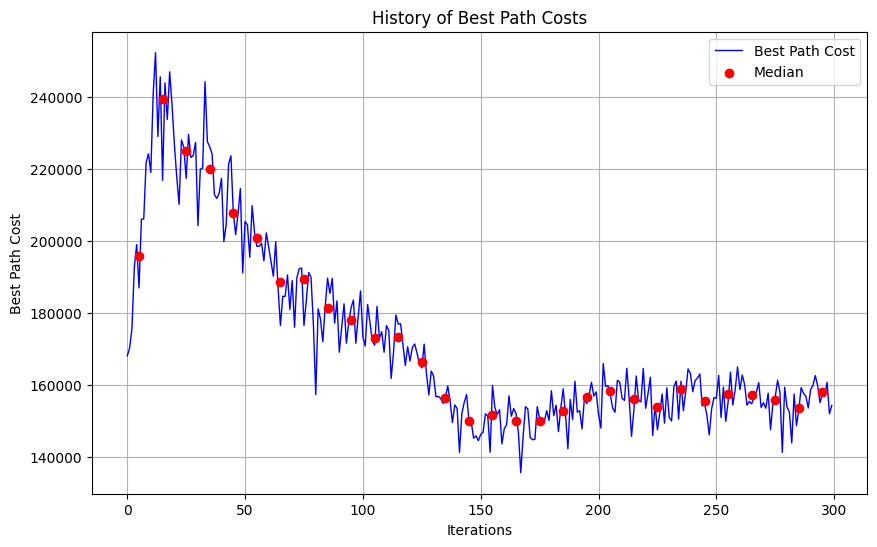

In [61]:
plot_history(tsp.history, 10)

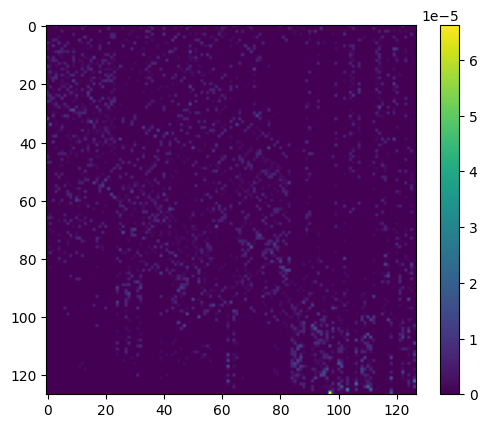

In [62]:
imshow(np.asarray(tsp.pheromone))
plt.colorbar()
plt.show()

135589
128


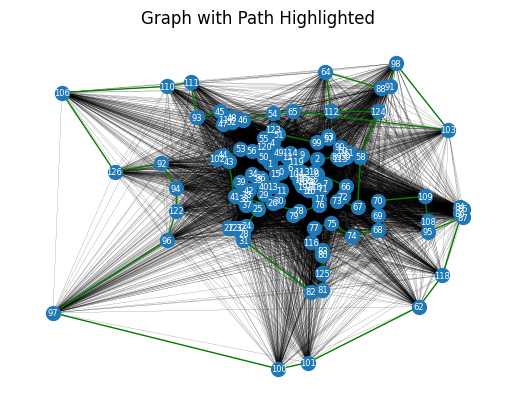

In [63]:
print(path.cost)
print(len(path.path))
plot_path(graph, path.path)

[85, 84, 109, 70, 69, 68, 74, 75, 77, 116, 83, 80, 125, 81, 82, 31, 28, 27, 121, 32, 24, 25, 37, 38, 41, 33, 42, 39, 40, 35, 36, 34, 43, 102, 44, 53, 56, 120, 50, 1, 12, 114, 49, 4, 55, 123, 51, 99, 63, 57, 90, 60, 61, 59, 115, 89, 2, 9, 119, 6, 0, 15, 13, 11, 29, 26, 30, 79, 78, 76, 17, 71, 18, 3, 21, 20, 16, 19, 107, 23, 5, 105, 14, 104, 113, 10, 8, 22, 7, 73, 67, 72, 66, 58, 103, 124, 88, 91, 98, 64, 112, 65, 54, 46, 48, 52, 47, 117, 45, 93, 111, 110, 106, 126, 92, 94, 122, 96, 97, 100, 101, 62, 118, 95, 108, 87, 86, 85]
122887


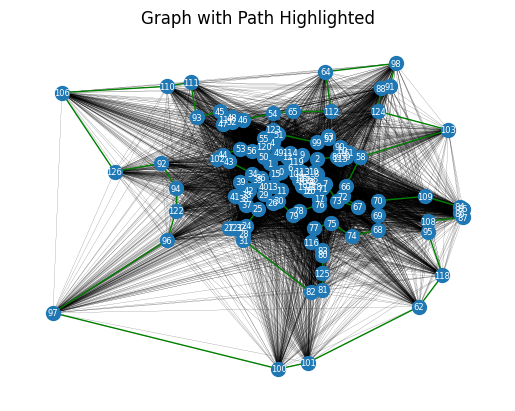

In [64]:
path.opt_alg()
print(path.path)
print(path.cost)
plot_path(graph, path.path)

In [65]:
tsp_sol = nx.approximation.traveling_salesman_problem(graph, cycle=True)
if len(tsp_sol) > 128:
    seen = set()
    unique_tsp_sol = [x for x in tsp_sol if not (x in seen or seen.add(x))]
    tsp_sol = unique_tsp_sol
    tsp_sol.append(tsp_sol[0])
    print(len(tsp_sol))

tsp_solution = Path(tsp_sol)
cost = tsp_solution.cost
tsp_solution_opt = Path(tsp_sol)
tsp_solution_opt.opt_alg()
cost_opt = tsp_solution_opt.cost

print("Cost with Christofides:", cost)
print("Best cost with 2-opt + Crisophides:", cost_opt)

128
Cost with Christofides: 132940
Best cost with 2-opt + Crisophides: 123824


Cost of the best optimised random path: 123361


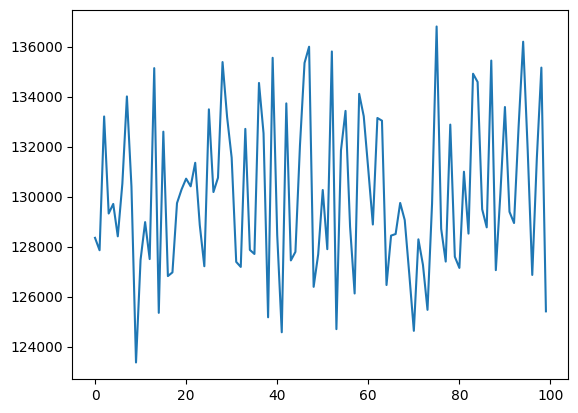

In [66]:
history = []
best_cost = 1000000
for i in range(100):
    random_path = list(range(len(graph.nodes)))
    random.shuffle(random_path)
    random_path = random_path + [random_path[0]]
    random_path = Path(random_path)
    random_path.opt_alg()
    if random_path.cost < best_cost:
        best_cost = random_path.cost
    history.append(random_path.cost)

print("Cost of the best optimised random path:", best_cost)
plt.plot(history)
plt.show()